In [109]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'+'improved_ff/' 
output_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

plot_systematic = 0

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [110]:
outputdir_png, outputdir_root, outputdir_pdf = NuCC.prepareOutput2(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)

In [111]:
# initialte ROOT default canvas
#ROOT.gROOT.SetBatch(ROOT.kFALSE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [112]:
from array import array
#mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
#mom_bins = [ 0.00, 0.225, 0.28, 0.33, 0.39, 0.52, 0.78, 1.21, 2.5]

mom_bins = {}
#mom_bins.Append()
mom_bins[0] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[1] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[2] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[3] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[4] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[5] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[6] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]
mom_bins[7] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]
mom_bins[8] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]

theta_bins = [ -1.00, -0.50, 0.00, 0.28, 0.47, 0.63, 0.765, 0.865, 0.935, 1.00 ]

len_theta = len(theta_bins) - 1
len_mom = {}
sum_bins = 0
for i in range(len_theta):
    len_mom[i] = len(mom_bins[i]) - 1
    #print len_mom[i]
    sum_bins+=len_mom[i]


# prepare systematics

Make numpy files including the backbgrounds and smearing matices for the different systematics:
detector, genie_all, genie_other, flux

What is needed is per universe: background, smearing matrix


# Detector systematic

Detector systematic: 1 universe, 1 sigma
Effects: cv, dedx, LYatt, LYdown, LYray, recomb2, SCE, WireAngleXZ, WireAngleYZ, WireModX, WireModYZ

In [113]:
#store all histograms needed in one file: bkg, smearing, covariance
if(1):
    path_detsys = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'

    f_cv = ROOT.TFile.Open(path_detsys+'xsec_detsys_CV_2D_t/xsec_detsys_CV_2D.root', 'read')
    f_dedx = ROOT.TFile.Open(path_detsys+'xsec_detsys_dEdx_2D_t/xsec_detsys_dEdx_2D.root', 'read')
    f_LYatt = ROOT.TFile.Open(path_detsys+'xsec_detsys_LYAtt_2D_t/xsec_detsys_LYAtt_2D.root', 'read')
    f_LYdown = ROOT.TFile.Open(path_detsys+'xsec_detsys_LYdown_2D_t/xsec_detsys_LYdown_2D.root', 'read')
    f_LYray = ROOT.TFile.Open(path_detsys+'xsec_detsys_LYRay_2D_t/xsec_detsys_LYRayleigh_2D.root', 'read')
    f_recomb2 = ROOT.TFile.Open(path_detsys+'xsec_detsys_recomb2_2D_t/xsec_detsys_recomb2_2D.root', 'read')
    f_sce = ROOT.TFile.Open(path_detsys+'xsec_detsys_SCE_2D_t/xsec_detsys_SCE_2D.root', 'read')
    f_waxz = ROOT.TFile.Open(path_detsys+'xsec_detsys_WireAngleXZ_2D_t/xsec_detsys_WireAngleXZ_2D.root', 'read')
    f_wayz = ROOT.TFile.Open(path_detsys+'xsec_detsys_WireAngleYZ_2D_t/xsec_detsys_WireAngleYZ_2D.root', 'read')
    f_wmx = ROOT.TFile.Open(path_detsys+'xsec_detsys_WireModX_2D_t/xsec_detsys_WireModX_2D.root', 'read')
    f_wmyz = ROOT.TFile.Open(path_detsys+'xsec_detsys_WireModYZ_2D_t/xsec_detsys_WireModYZ_2D.root', 'read')

    f_all = ROOT.TFile.Open(path_detsys+'xsec_detsys_all_2D_t/Detector_systematic_2D.root', 'read')
    
    h_true_cv = f_cv.Get('h_gen_all')
    h_sel_cv = f_cv.Get('h_sel_all')


    h_bkg_cv = f_cv.Get('h_bkg_all')
    h_bkg_dedx = f_dedx.Get('h_bkg_all')
    h_bkg_LYatt = f_LYatt.Get('h_bkg_all')
    h_bkg_LYdown = f_LYdown.Get('h_bkg_all')
    h_bkg_LYray = f_LYray.Get('h_bkg_all')
    h_bkg_recomb2 = f_recomb2.Get('h_bkg_all')
    h_bkg_sce = f_sce.Get('h_bkg_all')
    h_bkg_waxz = f_waxz.Get('h_bkg_all')
    h_bkg_wayz = f_wayz.Get('h_bkg_all')
    h_bkg_wmx = f_wmx.Get('h_bkg_all')
    h_bkg_wmyz = f_wmyz.Get('h_bkg_all')

    h_smear_cv = f_cv.Get('h_smearing')
    h_smear_dedx = f_dedx.Get('h_smearing')
    h_smear_LYatt = f_LYatt.Get('h_smearing')
    h_smear_LYdown = f_LYdown.Get('h_smearing')
    h_smear_LYray = f_LYray.Get('h_smearing')
    h_smear_recomb2 = f_recomb2.Get('h_smearing')
    h_smear_sce = f_sce.Get('h_smearing')
    h_smear_waxz = f_waxz.Get('h_smearing')
    h_smear_wayz = f_wayz.Get('h_smearing')
    h_smear_wmx = f_wmx.Get('h_smearing')
    h_smear_wmyz = f_wmyz.Get('h_smearing')

    #save all whats needed
    RootFile = ROOT.TFile(outputdir+"FF_detsys.root","RECREATE");
    #blbla.Write('dfdfs')
    h_true_cv.Write('h_true_cv')
    h_sel_cv.Write('h_sel_cv')
    
    h_bkg_cv.Write('h_bkg_cv')
    h_bkg_dedx.Write('h_bkg_dedx')
    h_bkg_LYatt.Write('h_bkg_LYatt')
    h_bkg_LYdown.Write('h_bkg_LYdown')
    h_bkg_LYray.Write('h_bkg_LYray')
    h_bkg_recomb2.Write('h_bkg_recomb2')
    h_bkg_sce.Write('h_bkg_sce')
    h_bkg_waxz.Write('h_bkg_waxz')
    h_bkg_wayz.Write('h_bkg_wayz')
    h_bkg_wmx.Write('h_bkg_wmx')
    h_bkg_wmyz.Write('h_bkg_wmyz')

    h_smear_cv.Write('h_smear_cv')
    h_smear_dedx.Write('h_smear_dedx')
    h_smear_LYatt.Write('h_smear_LYatt')
    h_smear_LYdown.Write('h_smear_LYdown')
    h_smear_LYray.Write('h_smear_LYray')
    h_smear_recomb2.Write('h_smear_recomb2')
    h_smear_sce.Write('h_smear_sce')
    h_smear_waxz.Write('h_smear_waxz')
    h_smear_wayz.Write('h_smear_wayz')
    h_smear_wmx.Write('h_smear_wmx')
    h_smear_wmyz.Write('h_smear_wmyz')

    RootFile.Close()

In [114]:
def main_plot(h_this):
    h_this.GetYaxis().SetTitleSize(0.05)
    h_this.GetYaxis().SetTitleOffset(0.0)
    h_this.GetYaxis().SetLabelSize(0.05)
    h_this.GetXaxis().SetTitleSize(0.05)
    h_this.GetXaxis().SetLabelSize(0.05)
    h_this.GetXaxis().SetTitleOffset(1)
    h_this.SetLineColor(ROOT.kBlack)
    h_this.SetLineWidth(4)
    #h_this.SetMinimum(0)
    #h_this.SetMaximum(-1111)
    #h_this.SetMaximum(h_g2.GetMaximum()*1.5)
    ROOT.gStyle.SetEndErrorSize(5)
    #c1.SetRightMargin(0.05)
    return

In [115]:
def return_detsys_covar(h_true):
    #calculate the covariance for the the prediction
    
    
    return

In [116]:
def return_detsys_smearing_covar():
    #calculate the covariance for the the prediction
    
    
    return

In [117]:
def return_detsys_background_covar(h_true):
    #calculate the covariance for the the prediction
    path_detsys = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff/'
    f_det = ROOT.TFile.Open(path_detsys+'FF_detsys.root', 'read')
    para = ['cv','dedx','LYatt','LYdown','LYray','recomb2','sce','waxz','wayz','wmx','wmyz']
    
    h_files = []
    h_smear_cv = f_det.Get('h_smear_cv')
    h_true_cv = f_det.Get('h_true_cv')
    #print h_smear_cv.GetNbinsX()
    num_bins = h_smear_cv.GetNbinsX()
    smear_mat = np.zeros((num_bins,num_bins))
    true_vec = np.zeros((num_bins))
    for i in range(num_bins):
        true_vec[i] = h_true_cv.GetBinContent(i+1)
        for j in range(num_bins):
            smear_mat[i][j]= h_smear_cv.GetBinContent(i+1,j+1)

    reco_vec = true_vec.dot(smear_mat)
    
    for i in para:
        h_files.append(f_det.Get('h_bkg_'+i))
    
    
    
    return

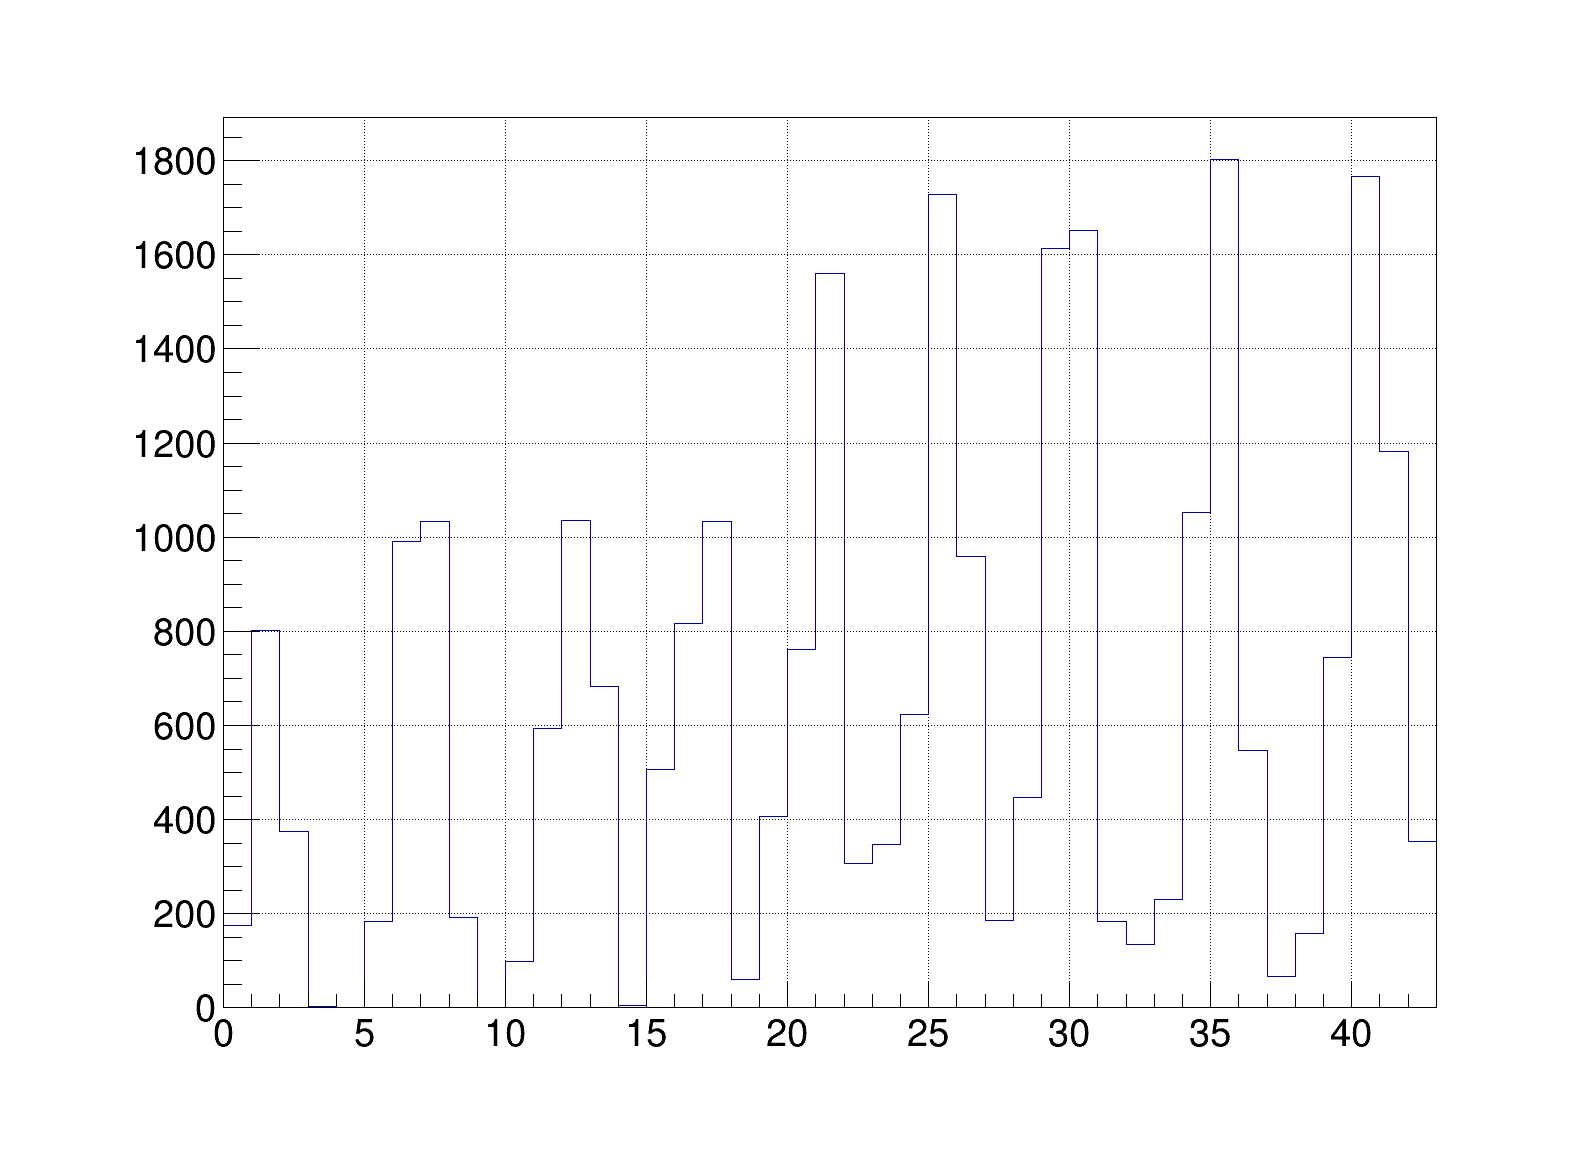

In [118]:
h_true_cv.Draw()
c1.Draw()

In [119]:
# give h_true_cv and POT since bkg is for specific POT
#this_pot = 2.15e20
this_pot = 9.457e+18 

path_detsys = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff/'
f_det = ROOT.TFile.Open(path_detsys+'FF_detsys.root', 'read')
para = ['dedx','LYatt','LYdown','LYray','recomb2','sce','waxz','wayz','wmx','wmyz']

h_true_cv = f_det.Get('h_true_cv')
h_true_cv.Scale(this_pot/9.457e18*0.0790366187306)
#for i in range(num_bins):
#    h_true_cv.SetBinContent(i+1,50)

h_bkg_cv = f_det.Get('h_bkg_cv')
h_bkg_cv.Scale(this_pot/9.457e18)
h_smear_cv = f_det.Get('h_smear_cv')
print h_smear_cv.GetNbinsX()
num_bins = h_smear_cv.GetNbinsX()
smear_mat = np.zeros((num_bins,num_bins))
true_vec = np.zeros((num_bins))
bkg_vec = np.zeros((num_bins))

for i in range(num_bins):
    true_vec[i] = h_true_cv.GetBinContent(i+1)
    bkg_vec[i] = h_bkg_cv.GetBinContent(i+1)
    for j in range(num_bins):
        smear_mat[i][j]= h_smear_cv.GetBinContent(i+1,j+1)

reco_vec = true_vec.dot(smear_mat)

bkg_vec_det = np.zeros((len(para),num_bins))
reco_vec_det = np.zeros((len(para),num_bins))
smear_mat_det = np.zeros((len(para),num_bins,num_bins))

#sig_vec_det = np.zeros((len(para),num_bins)) # signal + bkg prediction
res_vec_det = np.zeros((len(para),num_bins)) # residual
res_vec = np.zeros((num_bins)) # quadratic sum


h_bkg_det = []
h_smear_det = []
for i,x in enumerate(para):
    h_bkg_det.append(f_det.Get('h_bkg_'+x))
    h_bkg_det[i].Scale(this_pot/9.457e18)
    h_smear_det.append(f_det.Get('h_smear_'+x))
    for j in range(num_bins):
        bkg_vec_det[i][j] = h_bkg_det[i].GetBinContent(j+1)
        for k in range(num_bins):
            smear_mat_det[i][j][k] = h_smear_det[i].GetBinContent(j+1,k+1)
    reco_vec_det[i]= true_vec.dot(smear_mat_det[i])
    res_vec_det[i] = ((reco_vec+bkg_vec) - (reco_vec_det[i] + bkg_vec_det[i]))/(reco_vec+bkg_vec)

    for j in range(num_bins):
        res_vec[j] += res_vec_det[i][j]*res_vec_det[i][j]

frac_covar_det = np.zeros((num_bins,num_bins))
for i,x in enumerate(para):
    for j in range(num_bins):
        for k in range(num_bins):
            frac_covar_det[j][k] += res_vec_det[i][j] * res_vec_det[i][k]


43


In [124]:
print res_vec[1]
print frac_covar_det

0.006273311454240142
[[ 0.03616135 -0.01003982 -0.00469738 ...  0.00490369  0.00132783
  -0.00747232]
 [-0.01003982  0.00627331  0.00283166 ... -0.00034561 -0.00027513
   0.00409343]
 [-0.00469738  0.00283166  0.00854366 ... -0.00074143  0.00138977
   0.0024873 ]
 ...
 [ 0.00490369 -0.00034561 -0.00074143 ...  0.00325779  0.00059535
  -0.00089576]
 [ 0.00132783 -0.00027513  0.00138977 ...  0.00059535  0.006269
  -0.01673081]
 [-0.00747232  0.00409343  0.0024873  ... -0.00089576 -0.01673081
   0.13992172]]


In [121]:
#for i,x in enumerate(para):
#    print x, ': ', (reco_vec_det[i] + bkg_vec_det[i])/(reco_vec+bkg_vec)
h_bin_bkg = h_bkg_cv.Clone()
bin_counter=0
for t_bin in range(len_theta): #len_theta
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            h_bin_bkg.SetBinContent(bin_counter,-1000)
            if t_bin%2==0:
                h_bin_bkg.SetBinContent(bin_counter,1000)
h_bin_bkg.SetLineWidth(0)
h_bin_bkg.SetFillColorAlpha(ROOT.kGray,0.2)

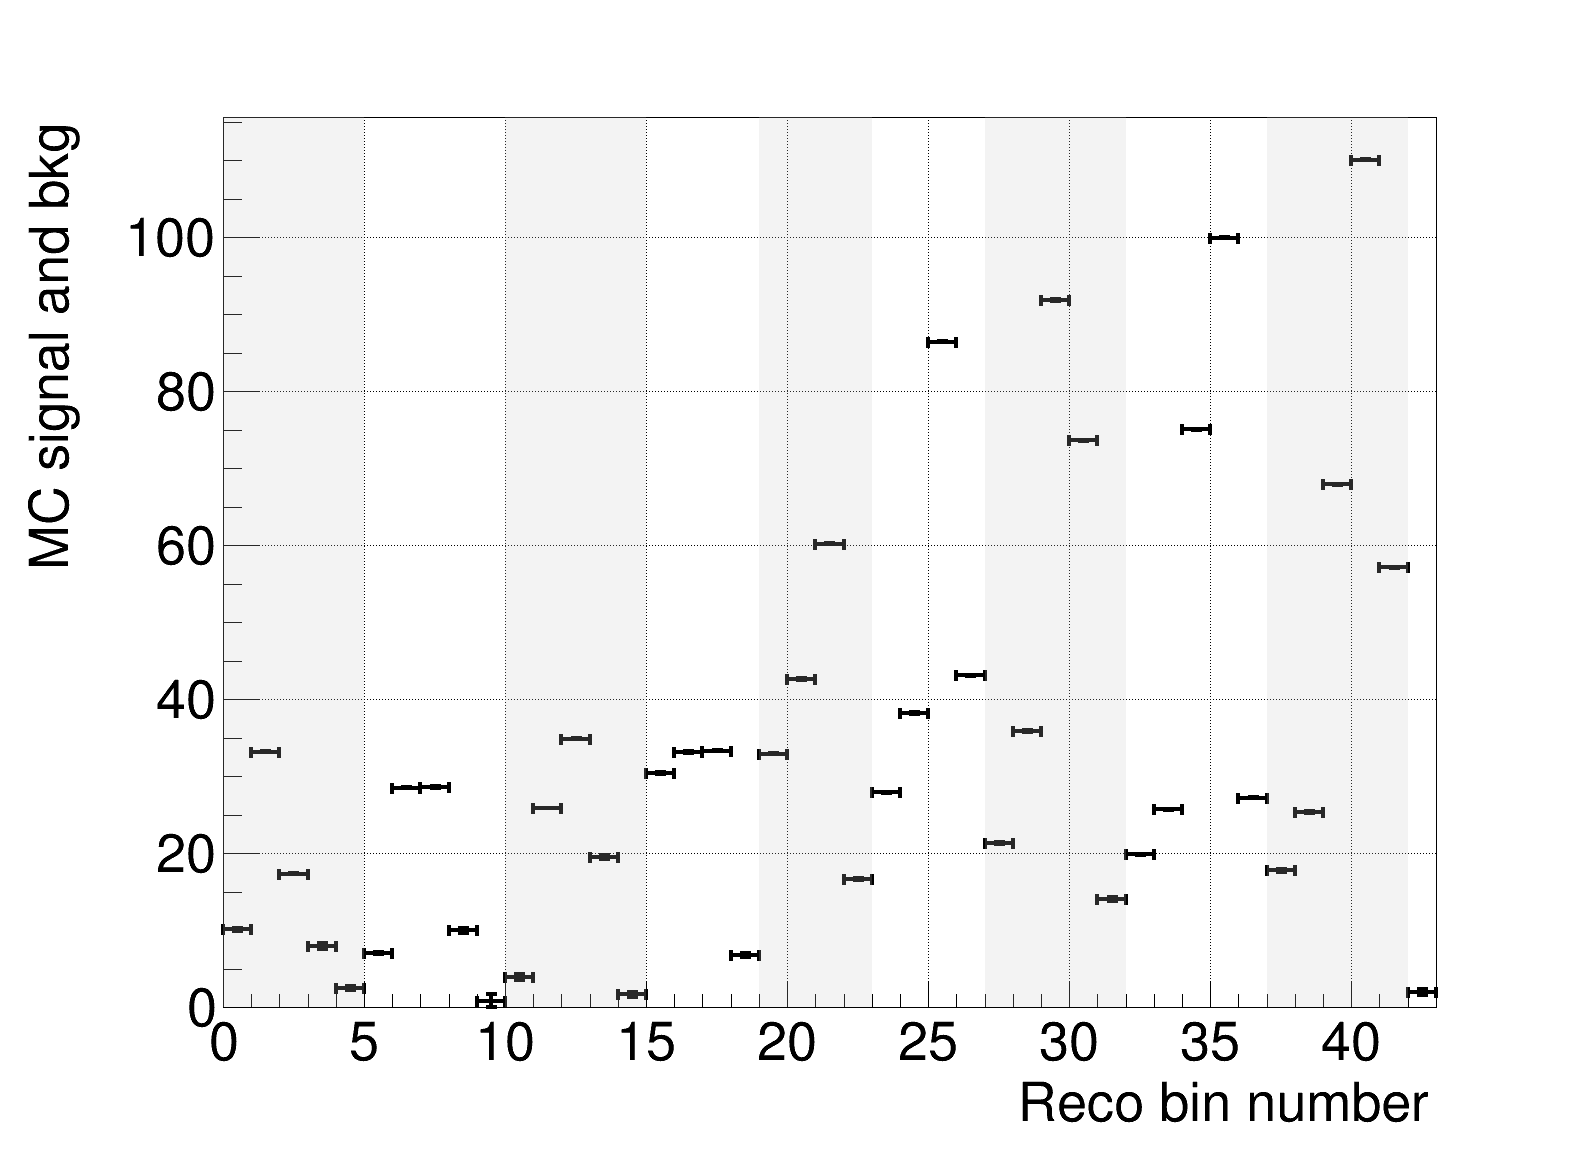

In [122]:
h_pred = h_bkg_cv.Clone()
for i in range(num_bins):
    h_pred.SetBinContent(i+1,reco_vec[i]+bkg_vec[i])
    h_pred.SetBinError(i+1, math.sqrt(res_vec[i]))
    #print math.sqrt(res_vec[i])

main_plot(h_pred)
h_pred.SetXTitle("Reco bin number")
h_pred.SetYTitle("MC signal and bkg")
h_pred.Draw('E1')
h_bin_bkg.Draw('same hist')
c1.Draw()
    

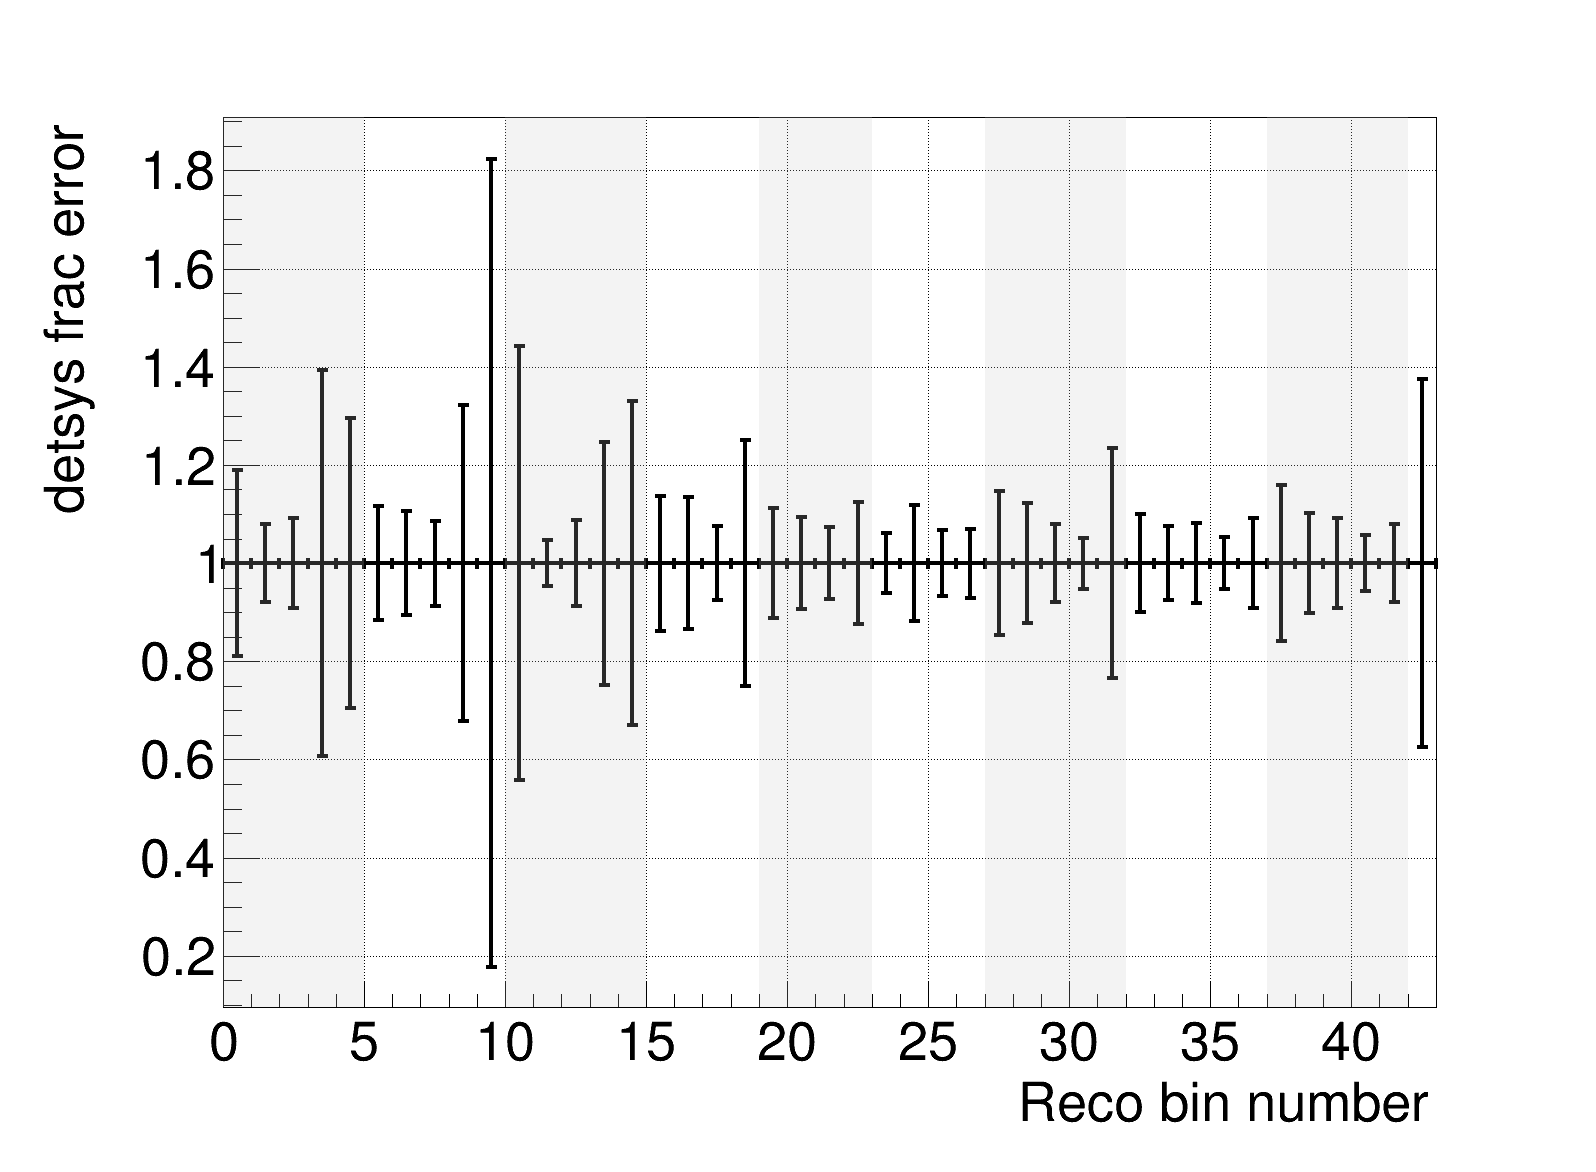

In [123]:
h_pred = h_bkg_cv.Clone()
for i in range(num_bins):
    h_pred.SetBinContent(i+1,1)
    h_pred.SetBinError(i+1, math.sqrt(res_vec[i]))
    #print math.sqrt(res_vec[i])
  
main_plot(h_pred)
h_pred.SetXTitle("Reco bin number")
h_pred.SetYTitle("detsys frac error")
h_pred.Draw('E1')
h_bin_bkg.Draw('same hist')
c1.Draw()

# Genie other syst

2 universes for different parameters
Take one universe minus the other as the uncertainty


In [16]:
weight_list = [ 'AxFFCCQEshape_UBGenie' , 'DecayAngMEC_UBGenie', 'NormCCCOH_UBGenie', 'NormNCCOH_UBGenie',\
               'RPA_CCQE_Reduced_UBGenie','RPA_CCQE_UBGenie','ThetaDelta2NRad_UBGenie','Theta_Delta2Npi_UBGenie',\
                'VecFFCCQEshape_UBGenie','XSecShape_CCMEC_UBGenie']
w_list = [0,1,2,3,4,5,6,7,8,9]

In [98]:
# give h_true_cv and POT since bkg is for specific POT
#this_pot = 2.15e20
this_pot = 9.457e+18 

path_other = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/pc46_data/'
f_other = ROOT.TFile.Open(path_other+'Other_Genie_2D.root', 'read')

h_true_cv = f_other.Get('h_gen_all_cv')
h_true_cv.Scale(this_pot/7.644e+18*0.00601602043545)
#for i in range(num_bins):
#    h_true_cv.SetBinContent(i+1,20)

num_bins = h_true_cv.GetNbinsX()
frac_covar = np.zeros((num_bins,num_bins))
for w in w_list:
    #take first uiverse as cv
    h_bkg_cv = f_other.Get('h_bkg_all['+str(w)+'][0]')
    h_bkg_cv.Scale(this_pot/7.644e+18)
    h_smear_cv = f_other.Get('h_smearing['+str(w)+'][0]')
    h_eff_cv = f_other.Get('h_eff_all['+str(w)+'][0]')
    h_eff_cv.SetBinContent(5,1)
    h_eff_cv.SetBinContent(10,1)
    
    h_bkg_1 = f_other.Get('h_bkg_all['+str(w)+'][1]')
    h_bkg_1.Scale(this_pot/7.644e+18)
    h_smear_1 = f_other.Get('h_smearing['+str(w)+'][1]')
    h_eff_1 = f_other.Get('h_eff_all['+str(w)+'][1]')
    h_eff_1.SetBinContent(5,1)
    h_eff_1.SetBinContent(10,1)
    
    smear_mat = np.zeros((num_bins,num_bins))
    true_vec = np.zeros((num_bins))
    bkg_vec = np.zeros((num_bins))
    
    smear_mat1 = np.zeros((num_bins,num_bins))
    bkg_vec1 = np.zeros((num_bins))

    for i in range(num_bins):
        true_vec[i] = h_true_cv.GetBinContent(i+1)
        bkg_vec[i] = h_bkg_cv.GetBinContent(i+1)

        bkg_vec1[i] = h_bkg_1.GetBinContent(i+1)
        for j in range(num_bins):
            smear_mat[i][j]= h_smear_cv.GetBinContent(i+1,j+1)*h_eff_cv.GetBinContent(j+1)
            smear_mat1[i][j]= h_smear_1.GetBinContent(i+1,j+1)*h_eff_1.GetBinContent(j+1)

    reco_vec = true_vec.dot(smear_mat)
    reco_vec1 = true_vec.dot(smear_mat1)
    
    res_vec_other = ((reco_vec+bkg_vec) - (reco_vec1 + bkg_vec1))/(reco_vec+bkg_vec)
    
    frac_covar_other = np.zeros((num_bins,num_bins))
    for j in range(num_bins):
        for k in range(num_bins):
            frac_covar_other[j][k] += res_vec_other[j] * res_vec_other[k]
    frac_covar += frac_covar_other


In [99]:
print frac_covar

[[ 2.21098284e-02  2.82943237e-03  3.69636058e-03 ... -2.25764676e-03
  -1.23595029e-03 -2.22296152e-04]
 [ 2.82943237e-03  5.56030371e-04  7.12535191e-04 ... -2.93107340e-04
  -1.95929537e-04 -5.83049653e-05]
 [ 3.69636058e-03  7.12535191e-04  1.57700366e-03 ... -1.49816861e-04
  -1.32621276e-04 -1.17736877e-03]
 ...
 [-2.25764676e-03 -2.93107340e-04 -1.49816861e-04 ...  3.32400933e-04
   2.01475662e-04 -3.99449495e-04]
 [-1.23595029e-03 -1.95929537e-04 -1.32621276e-04 ...  2.01475662e-04
   1.51329688e-04 -2.42392952e-04]
 [-2.22296152e-04 -5.83049653e-05 -1.17736877e-03 ... -3.99449495e-04
  -2.42392952e-04  1.91216209e-03]]


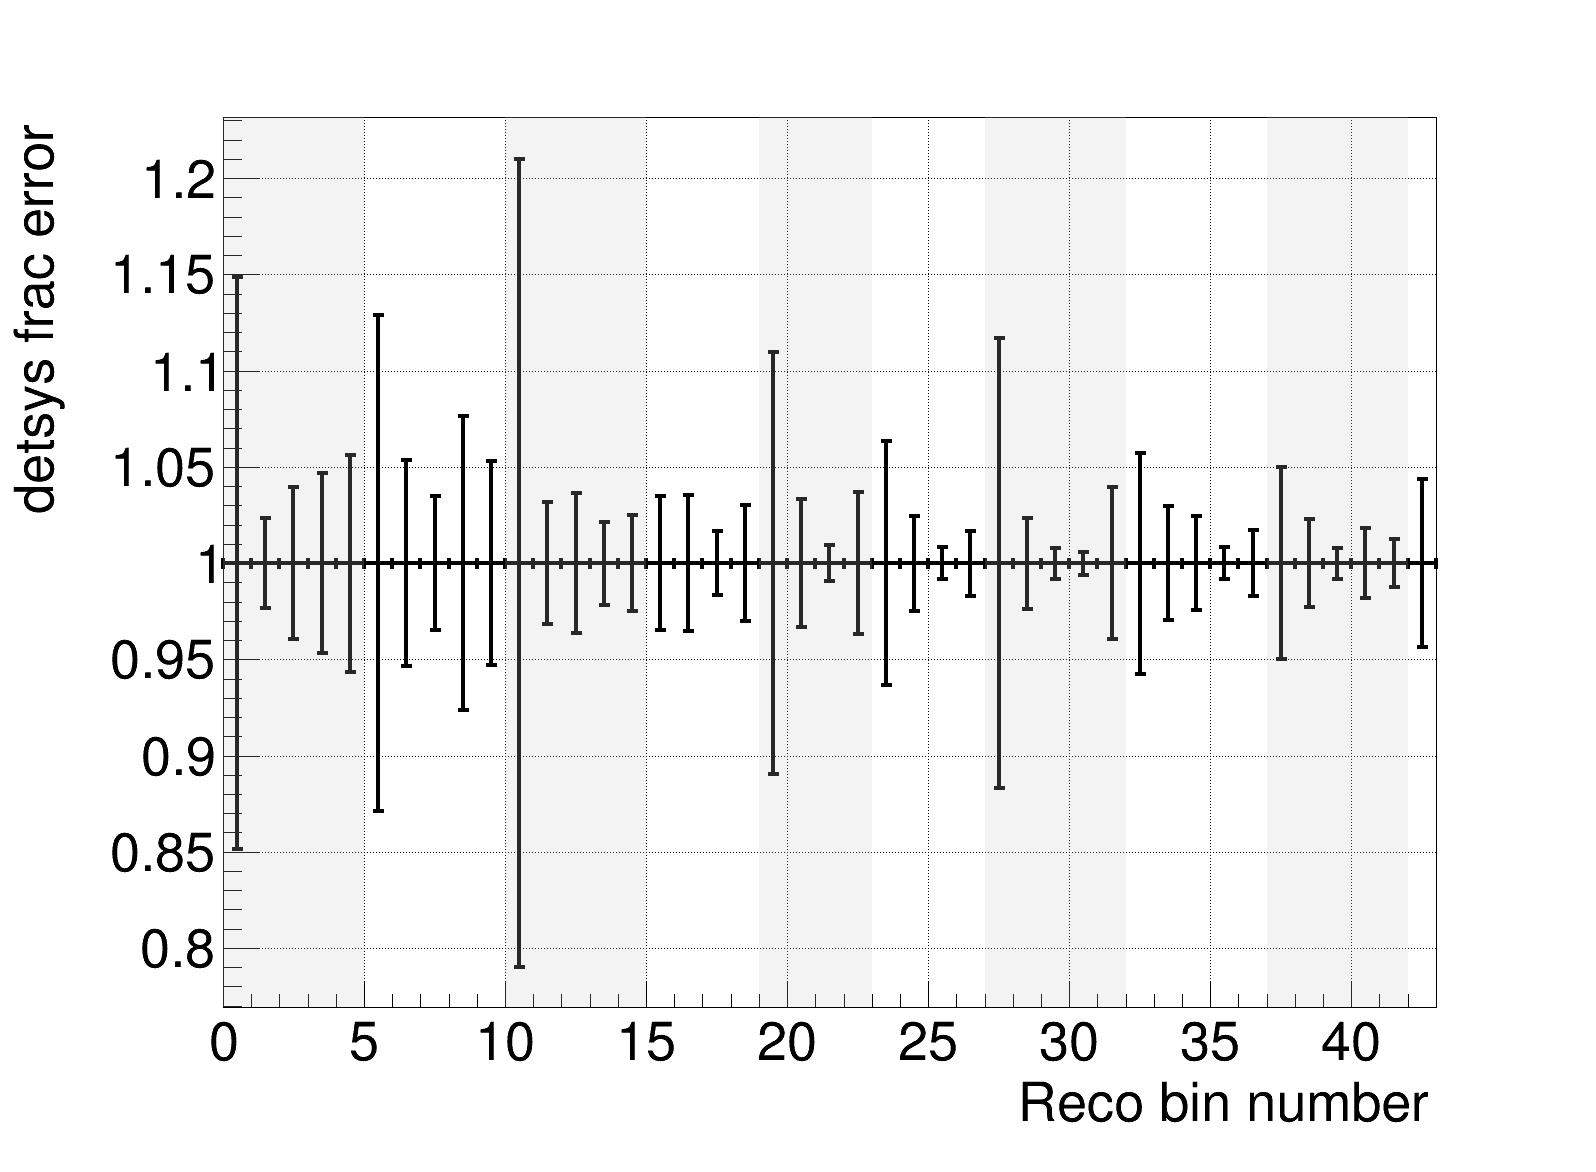

In [100]:
h_pred = h_bkg_cv.Clone()
for i in range(num_bins):
    h_pred.SetBinContent(i+1,1)
    h_pred.SetBinError(i+1, math.sqrt(frac_covar[i][i]))
    #print math.sqrt(res_vec[i])
  
main_plot(h_pred)
h_pred.SetXTitle("Reco bin number")
h_pred.SetYTitle("detsys frac error")
h_pred.Draw('E1')
h_bin_bkg.Draw('same hist')
c1.Draw()

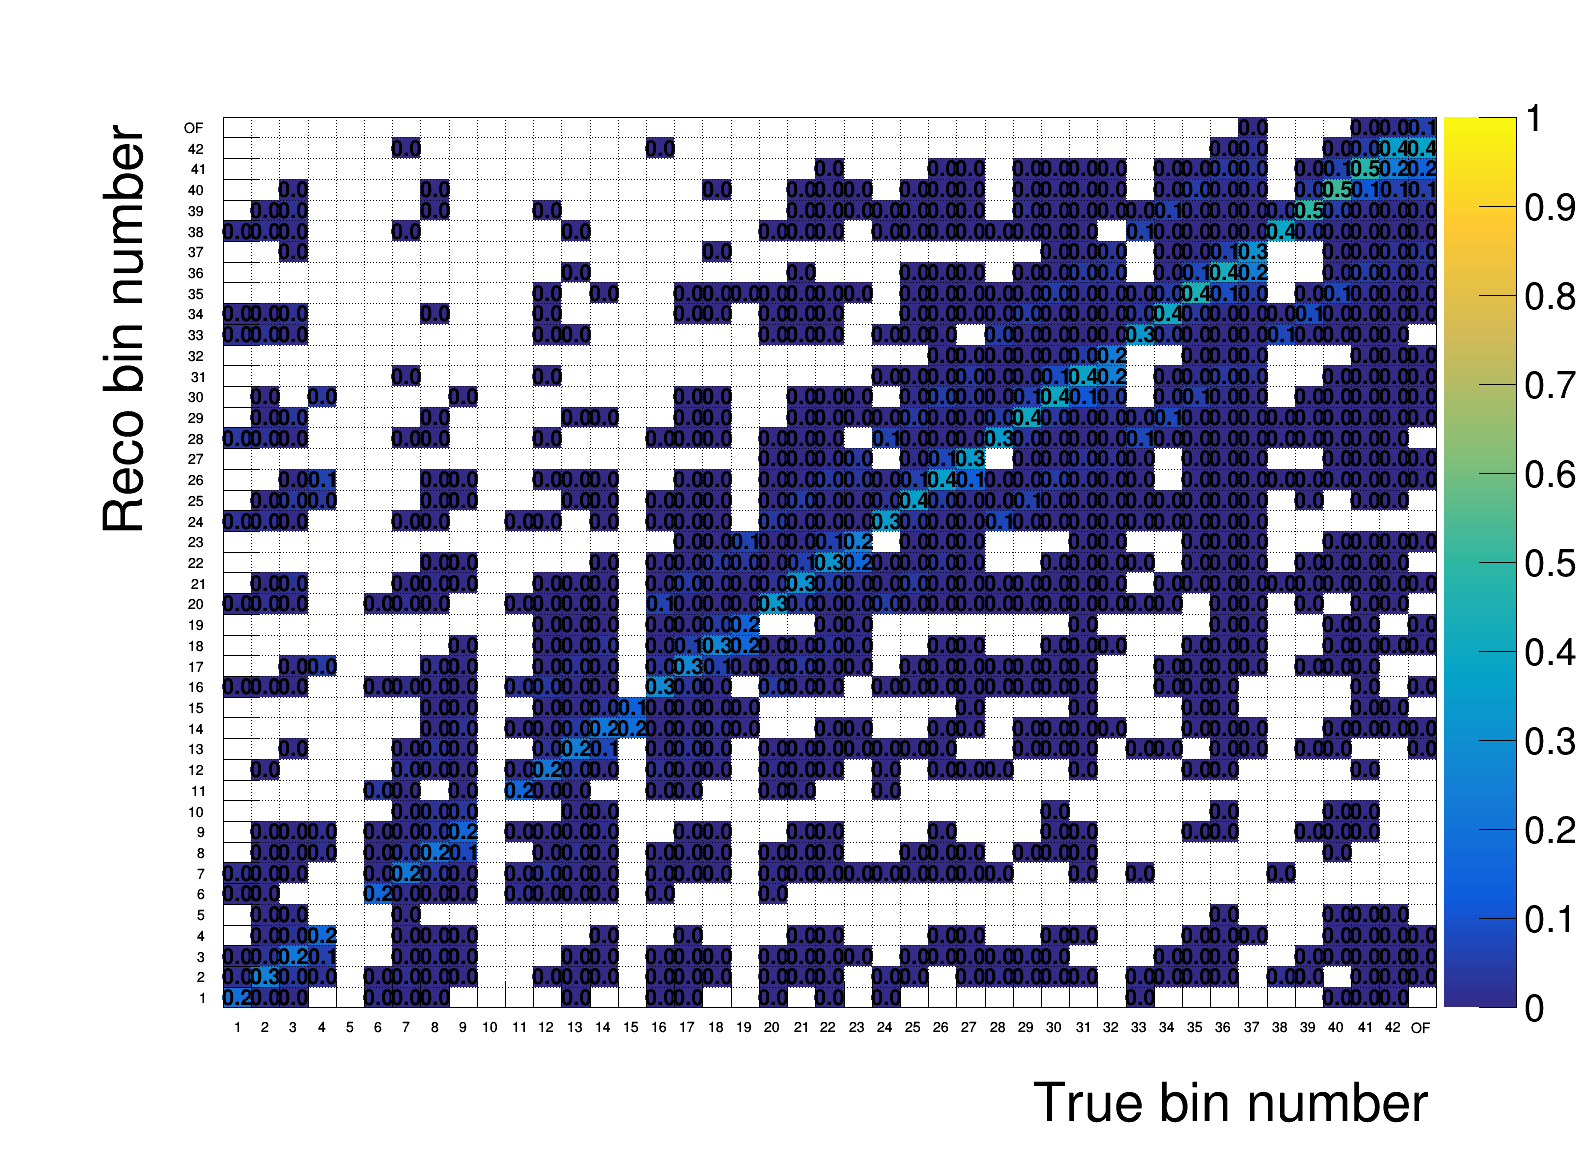

In [20]:
h_smear_test = h_smear_cv.Clone()
for i in range(num_bins):
    for j in range(num_bins):
        h_smear_test.SetBinContent(i+1,j+1,smear_mat[i][j])
ROOT.gStyle.SetPaintTextFormat('0.1f')

h_smear_test.Draw('colz text')
c1.Draw()

# Genie all systematic

100 universes, take mean as sigma

In [101]:
# give h_true_cv and POT since bkg is for specific POT
#this_pot = 2.15e20
this_pot = 9.457e+18 

path_all = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/pc46_data/'
f_all = ROOT.TFile.Open(path_all+'All_Genie_2D.root', 'read')

h_true_cv = f_all.Get('h_gen_all_cv')
h_true_cv.Scale(this_pot/7.644e+18)#*0.00601602043545)
#for i in range(num_bins):
#    h_true_cv.SetBinContent(i+1,20)

h_bkg_cv = f_all.Get('h_bkg_all[0]')
bin_counter=0
for t_bin in range(len_theta): #len_theta
    h_temp = f_all.Get('h_overlay_cv['+str(t_bin)+']')
    for m_bin in range(len_mom[t_bin]):
        bin_counter+=1
        h_bkg_cv.SetBinContent(bin_counter,h_temp.GetBinContent(m_bin+1))
            
h_bkg_cv.Scale(this_pot/7.644e+18)
h_smear_cv = f_all.Get('h_smearing_cv')
h_eff_cv = f_all.Get('h_eff_all_cv')
h_eff_cv.SetBinContent(5,1)
h_eff_cv.SetBinContent(10,1)

num_bins = h_smear_cv.GetNbinsX()
smear_mat = np.zeros((num_bins,num_bins))
true_vec = np.zeros((num_bins))
bkg_vec = np.zeros((num_bins))

for i in range(num_bins):
    true_vec[i] = h_true_cv.GetBinContent(i+1)
    bkg_vec[i] = h_bkg_cv.GetBinContent(i+1)
    for j in range(num_bins):
        smear_mat[i][j]= h_smear_cv.GetBinContent(i+1,j+1)*h_eff_cv.GetBinContent(j+1)
print smear_mat[0][0]   

reco_vec = true_vec.dot(smear_mat)

num_universe = 100

bkg_vec_all = np.zeros((num_universe,num_bins))
reco_vec_all = np.zeros((num_universe,num_bins))
smear_mat_all = np.zeros((num_universe,num_bins,num_bins))

res_vec_all = np.zeros((num_universe,num_bins))

h_bkg_all = []
h_smear_all = []
h_eff_all = []
for uni in range(num_universe):
    #do something
    h_bkg_all.append(f_all.Get('h_bkg_all['+str(uni)+']'))
    h_bkg_all[uni].Scale(this_pot/7.644e+18)
    h_smear_all.append(f_all.Get('h_smearing['+str(uni)+']'))
    h_eff_all.append(f_all.Get('h_eff_all['+str(uni)+']'))
    h_eff_all[uni].SetBinContent(5,1)
    h_eff_all[uni].SetBinContent(10,1)

    for j in range(num_bins):
        bkg_vec_all[uni][j] = h_bkg_all[uni].GetBinContent(j+1)
        for k in range(num_bins):
            smear_mat_all[uni][j][k] = h_smear_all[uni].GetBinContent(j+1,k+1)*h_eff_all[uni].GetBinContent(k+1)
    reco_vec_all[uni]= true_vec.dot(smear_mat_all[uni])
    res_vec_all[uni] = ((reco_vec+bkg_vec) - (reco_vec_all[uni] + bkg_vec_all[uni]))/(reco_vec+bkg_vec)

frac_covar_all = np.zeros((num_bins,num_bins))
for uni in range(num_universe):
    for j in range(num_bins):
        for k in range(num_bins):
            frac_covar_all[j][k] += res_vec_all[uni][j] * res_vec_all[uni][k]
frac_covar_all = frac_covar_all/num_universe
    
    


0.18782934224720194


In [102]:
print frac_covar_all[1][1]

0.0005136451111665331


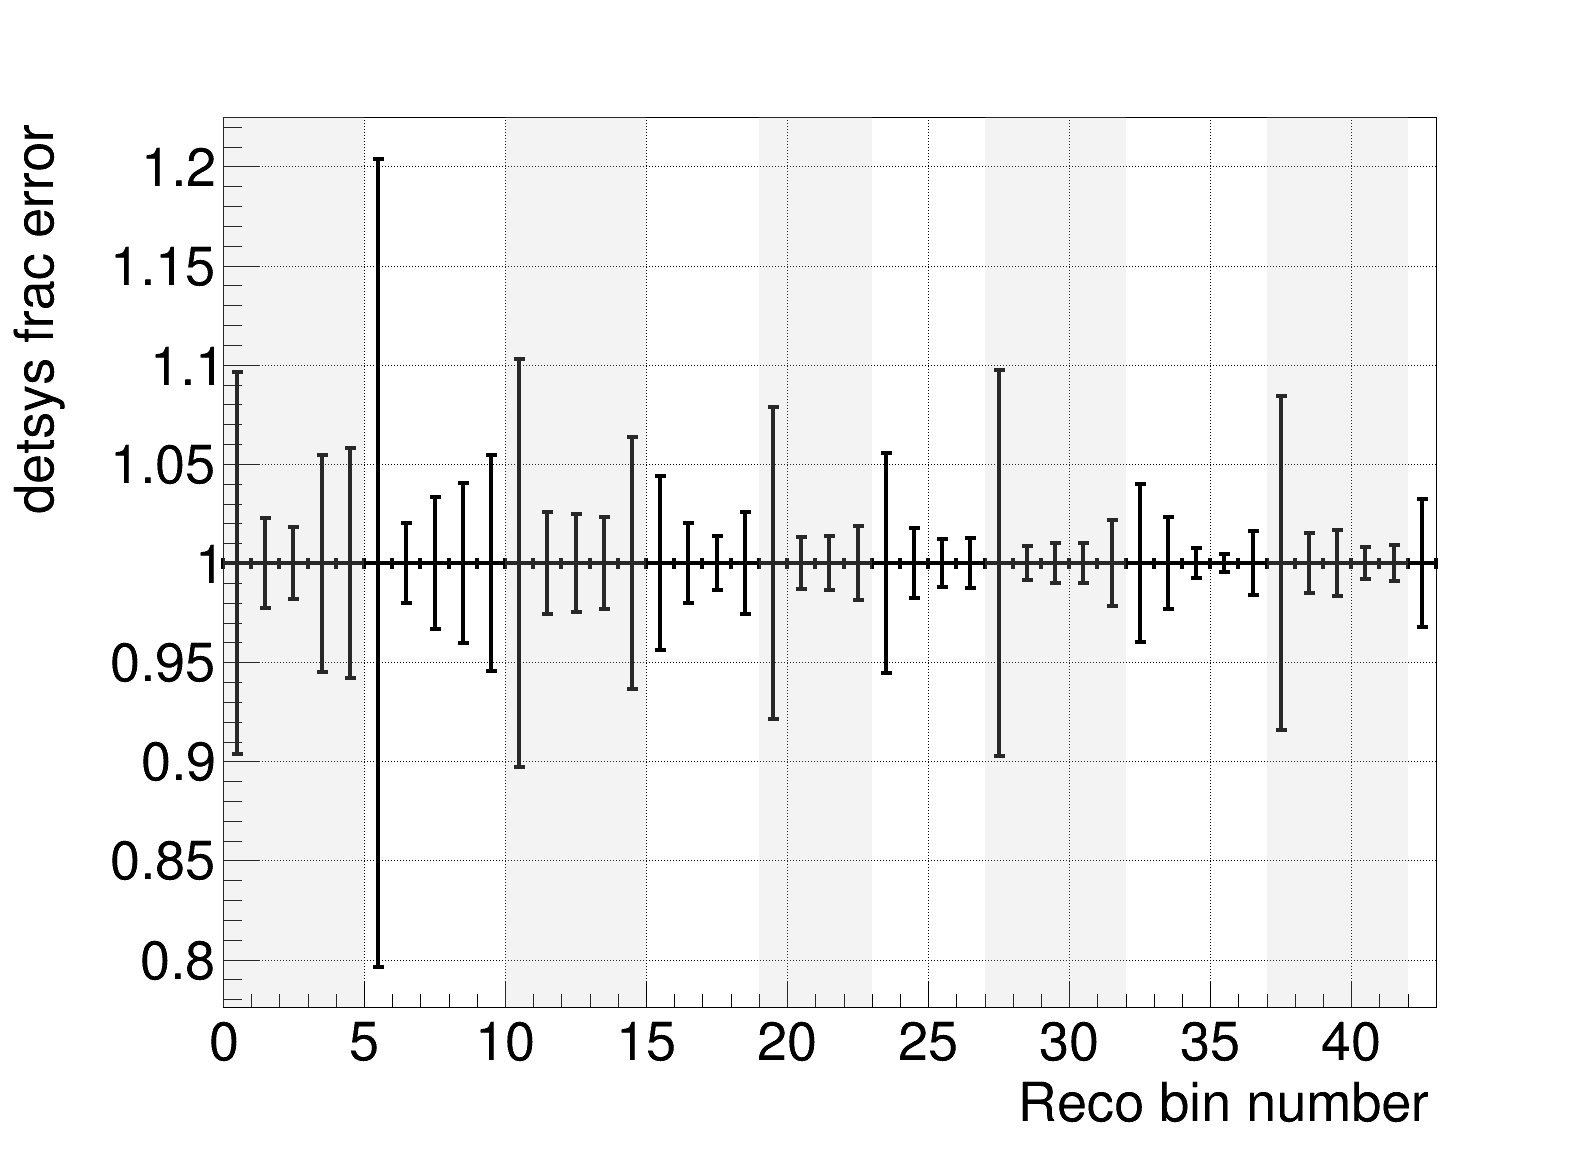

In [103]:
h_pred = h_bkg_cv.Clone()
for i in range(num_bins):
    h_pred.SetBinContent(i+1,1)
    h_pred.SetBinError(i+1, math.sqrt(frac_covar_all[i][i]))
    #print math.sqrt(res_vec[i])
  
main_plot(h_pred)
h_pred.SetXTitle("Reco bin number")
h_pred.SetYTitle("detsys frac error")
h_pred.Draw('E1')
h_bin_bkg.Draw('same hist')
c1.Draw()

# Flux systematic

Calculate the uncertatinty using 100 universes including the total integrated flux...

In [24]:
# give h_true_cv and POT since bkg is for specific POT
# BACKGROUND, EFFICIENCY ARE IN ONE FILE, SMEARING IN OTHER...
#this_pot = 2.15e20
this_pot = 9.457e+18 

path = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/Flux/zarko/'
path_flux = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/pc46_data/'

#weight_list = [ 'expskin_FluxUnisim', 'horncurrent_FluxUnisim' ]
weight_list = [ 'expskin_FluxUnisim', 'horncurrent_FluxUnisim', 'kminus_PrimaryHadronNormalization', 'kplus_PrimaryHadronFeynmanScaling',\
    'kzero_PrimaryHadronSanfordWang', 'nucleoninexsec_FluxUnisim', 'nucleonqexsec_FluxUnisim', 'nucleontotxsec_FluxUnisim',\
    'piminus_PrimaryHadronSWCentralSplineVariation', 'pioninexsec_FluxUnisim', 'pionqexsec_FluxUnisim', 'piontotxsec_FluxUnisim',\
    'piplus_PrimaryHadronSWCentralSplineVariation' ]

f_flux_int = ROOT.TFile.Open(path+"MCC9_FluxHist_volTPCActive.root", 'read')
#h_cv = f_flux_int.Get("hEnumu_cv")

f_flux_smear = []
f_flux_bkg = []
for i,x in enumerate(weight_list):
    f_flux_smear.append(ROOT.TFile.Open(path_flux+'xsec_2d_flux/root_output/'+x+'_Flux_systematic.root', 'read'))
    f_flux_bkg.append(ROOT.TFile.Open(path_flux+'xsec_2d_flux_rest/root_output/'+x+'_Flux_systematic_rest.root', 'read'))

h_true_cv = f_flux_bkg[0].Get('h_gen_all_cv')
h_true_cv.Scale(this_pot/7.644e+18)#*0.00601602043545)
#for i in range(num_bins):
#    h_true_cv.SetBinContent(i+1,20)

h_bkg_cv = f_flux_bkg[0].Get('h_bkg_all[0][0]')
bin_counter=0
for t_bin in range(len_theta): #len_theta
    h_temp = f_flux_bkg[0].Get('h_overlay_cv['+str(t_bin)+']')
    for m_bin in range(len_mom[t_bin]):
        bin_counter+=1
        h_bkg_cv.SetBinContent(bin_counter,h_temp.GetBinContent(m_bin+1))

NumberOfFiles = 5000
POT_file = 5e8
activeVol_Area = 128.175*2*116.5*2
h_flux_cv = f_flux_int.Get("hEnumu_cv")
flux_cv = h_flux_cv.Integral(-1,201)/(NumberOfFiles*POT_file*activeVol_Area)*this_pot

h_bkg_cv.Scale(this_pot/7.644e+18)
h_smear_cv = f_flux_smear[0].Get('h_smearing_cv')
h_eff_cv = f_flux_bkg[0].Get('h_eff_all_cv')
h_eff_cv.SetBinContent(5,1)
h_eff_cv.SetBinContent(10,1)

num_bins = h_smear_cv.GetNbinsX()
smear_mat = np.zeros((num_bins,num_bins))
true_vec = np.zeros((num_bins))
bkg_vec = np.zeros((num_bins))

for i in range(num_bins):
    true_vec[i] = h_true_cv.GetBinContent(i+1)
    bkg_vec[i] = h_bkg_cv.GetBinContent(i+1)
    for j in range(num_bins):
        smear_mat[i][j]= h_smear_cv.GetBinContent(i+1,j+1)*h_eff_cv.GetBinContent(j+1)
print smear_mat[0][0]   

reco_vec = true_vec.dot(smear_mat)

num_universe = 100

bkg_vec_flux = np.zeros((len(weight_list),num_universe,num_bins))
reco_vec_flux = np.zeros((len(weight_list),num_universe,num_bins))
smear_mat_flux = np.zeros((len(weight_list),num_universe,num_bins,num_bins))

res_vec_flux = np.zeros((len(weight_list),num_universe,num_bins))
h_bkg_flux = []
h_smear_flux = []
h_eff_flux = []
for i,x in enumerate(weight_list):
    h_bkg_flux.append([])
    h_smear_flux.append([])
    h_eff_flux.append([])
    for uni in range(num_universe):
        #do something
        h_bkg_flux[i].append(f_flux_bkg[i].Get('h_bkg_all[0]['+str(uni)+']'))
        h_bkg_flux[i][uni].Scale(this_pot/7.644e+18)
        h_smear_flux[i].append(f_flux_smear[i].Get('h_smearing[0]['+str(uni)+']'))
        h_eff_flux[i].append(f_flux_bkg[i].Get('h_eff_all[0]['+str(uni)+']'))
        h_eff_flux[i][uni].SetBinContent(5,1)
        h_eff_flux[i][uni].SetBinContent(10,1)
        
        h_flux_var = f_flux_int.Get('numu_ms_'+x+'/hEnumu_'+x+'_ms_'+str(uni))
        flux_var = h_flux_var.Integral(-1,201)/(NumberOfFiles*POT_file*activeVol_Area)*this_pot
        #print flux_cv, flux_var, (flux_var-flux_cv)/flux_var 
        for j in range(num_bins):
            bkg_vec_flux[i][uni][j] = h_bkg_flux[i][uni].GetBinContent(j+1)
            for k in range(num_bins):
                smear_mat_flux[i][uni][j][k] = h_smear_flux[i][uni].GetBinContent(j+1,k+1)*h_eff_flux[i][uni].GetBinContent(k+1)
        reco_vec_flux[i][uni]= true_vec.dot(smear_mat_flux[i][uni])
        res_vec_flux[i][uni] = ((reco_vec+bkg_vec)/flux_cv - (reco_vec_flux[i][uni] + bkg_vec_flux[i][uni])/flux_var)/((reco_vec+bkg_vec)/flux_cv)

frac_covar_flux_vec = np.zeros((len(weight_list),num_bins,num_bins))
for i,x in enumerate(weight_list):
    for uni in range(num_universe):
        for j in range(num_bins):
            for k in range(num_bins):
                frac_covar_flux_vec[i][j][k] += res_vec_flux[i][uni][j] * res_vec_flux[i][uni][k]
    frac_covar_flux_vec[i] = frac_covar_flux_vec[i]/num_universe
    
frac_covar_flux = np.zeros((num_bins,num_bins))
for i,x in enumerate(weight_list):
    frac_covar_flux += frac_covar_flux_vec[i]
    


0.18782934224720194


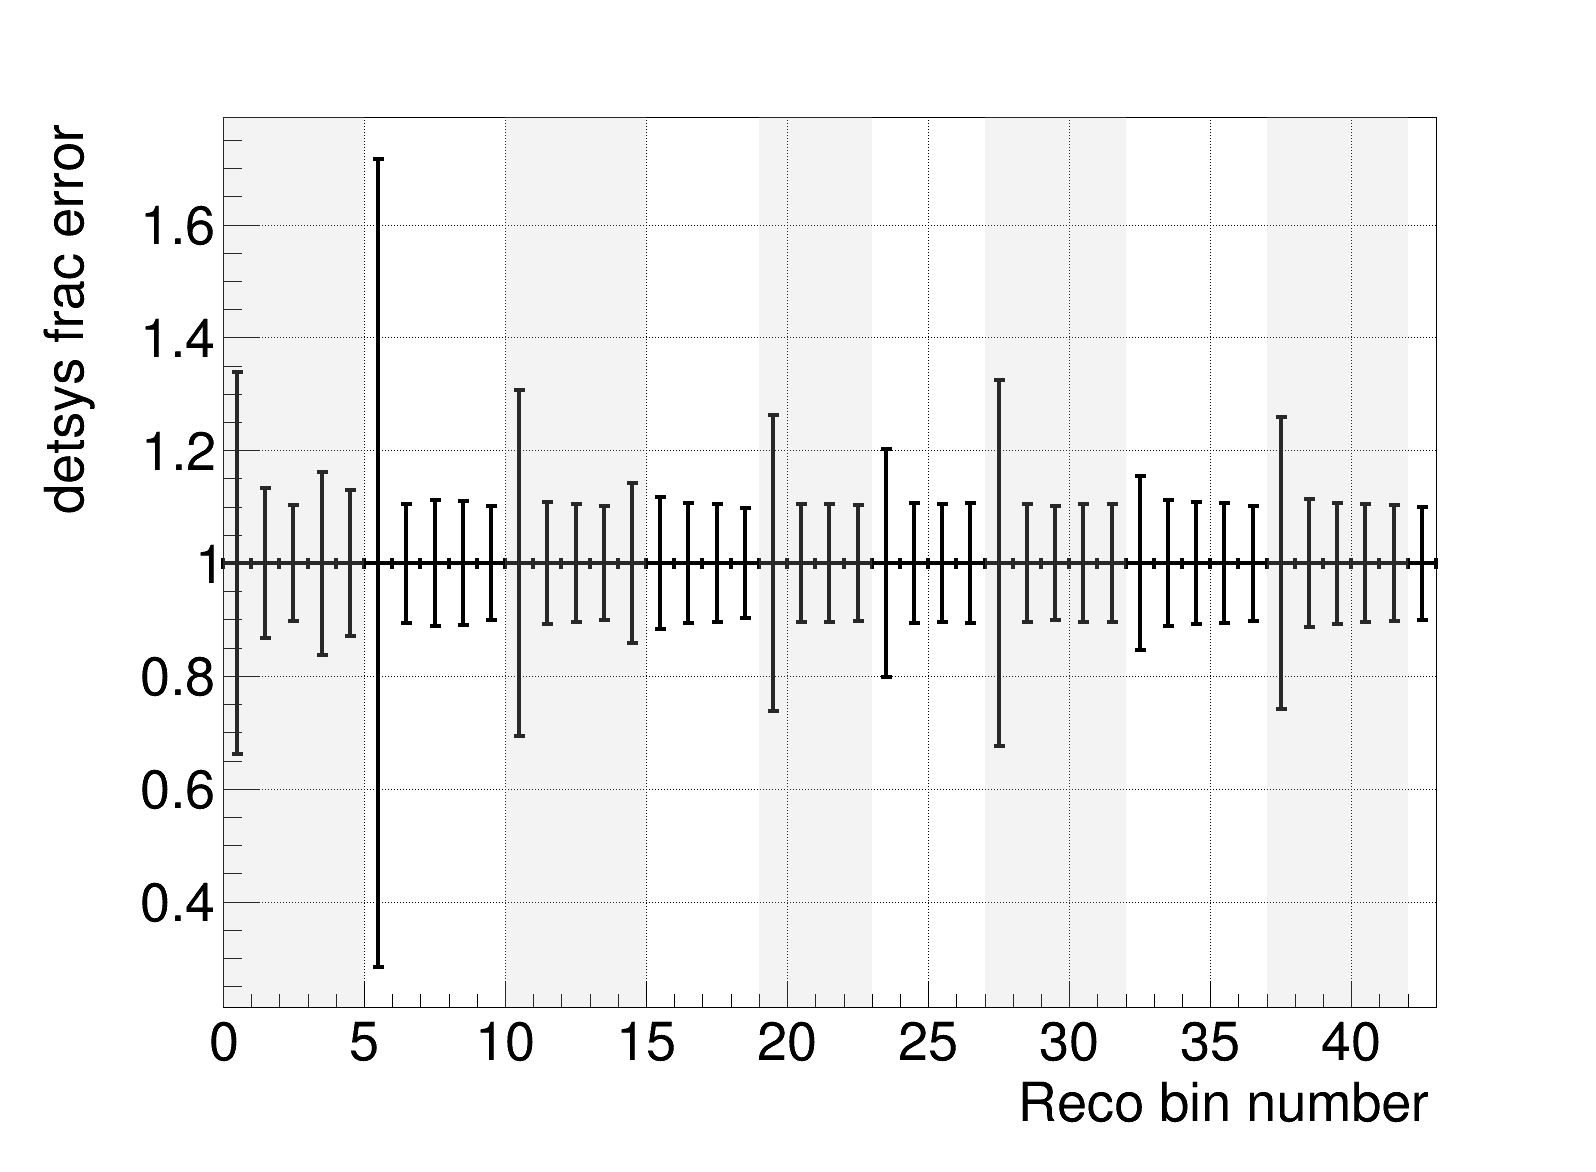

In [108]:
h_pred = h_bkg_cv.Clone()
for i in range(num_bins):
    h_pred.SetBinContent(i+1,1)
    h_pred.SetBinError(i+1, math.sqrt(frac_covar_flux[i][i]))
    #print math.sqrt(res_vec[i])
  
main_plot(h_pred)
h_pred.SetXTitle("Reco bin number")
h_pred.SetYTitle("detsys frac error")
h_pred.Draw('E1')
h_bin_bkg.Draw('same hist')
c1.Draw()

In [105]:
def plot_array(this_array):
    n_bins = this_array.shape
    dim = len(n_bins)
    if dim == 1:
        h_this = ROOT.TH1F('h_this',"Title",n_bins[0],0,n_bins[0])
        for i in range(n_bins[0]):
            h_this.SetBinContent(i+1,this_array[i])
    if dim == 2:
        h_this = ROOT.TH2F('h_this',"Title",n_bins[0],0,n_bins[0],n_bins[1],0,n_bins[1])
        for i in range(n_bins[0]):
            for j in range(n_bins[0]):
                h_this.SetBinContent(i+1,j+1,this_array[i][j])
    main_plot(h_this)        
    return h_this
    
def plot2arr(h_this, dim):
    if dim == 1:
        n_bins = h_this.GetNbinsX()
        arr = np.zeros((n_bins))
        for i in range(n_bins):
            arr[i] = h_this.GetBinContent(i+1)
    if dim == 2:
        n_bins = np.zeros((2))
        n_bins[0] = int(h_this.GetNbinsX())
        n_bins[1] = int(h_this.GetNbinsY())
        n_bins.astype(np.int64)
        print n_bins
        arr = np.zeros((np.int64(n_bins[0]),np.int64(n_bins[1])))
        for i in range(np.int64(n_bins[0])):
            for j in range(np.int64(n_bins[1])):
                arr[i][j] = h_this.GetBinContent(i+1,j+1)

    return arr
    

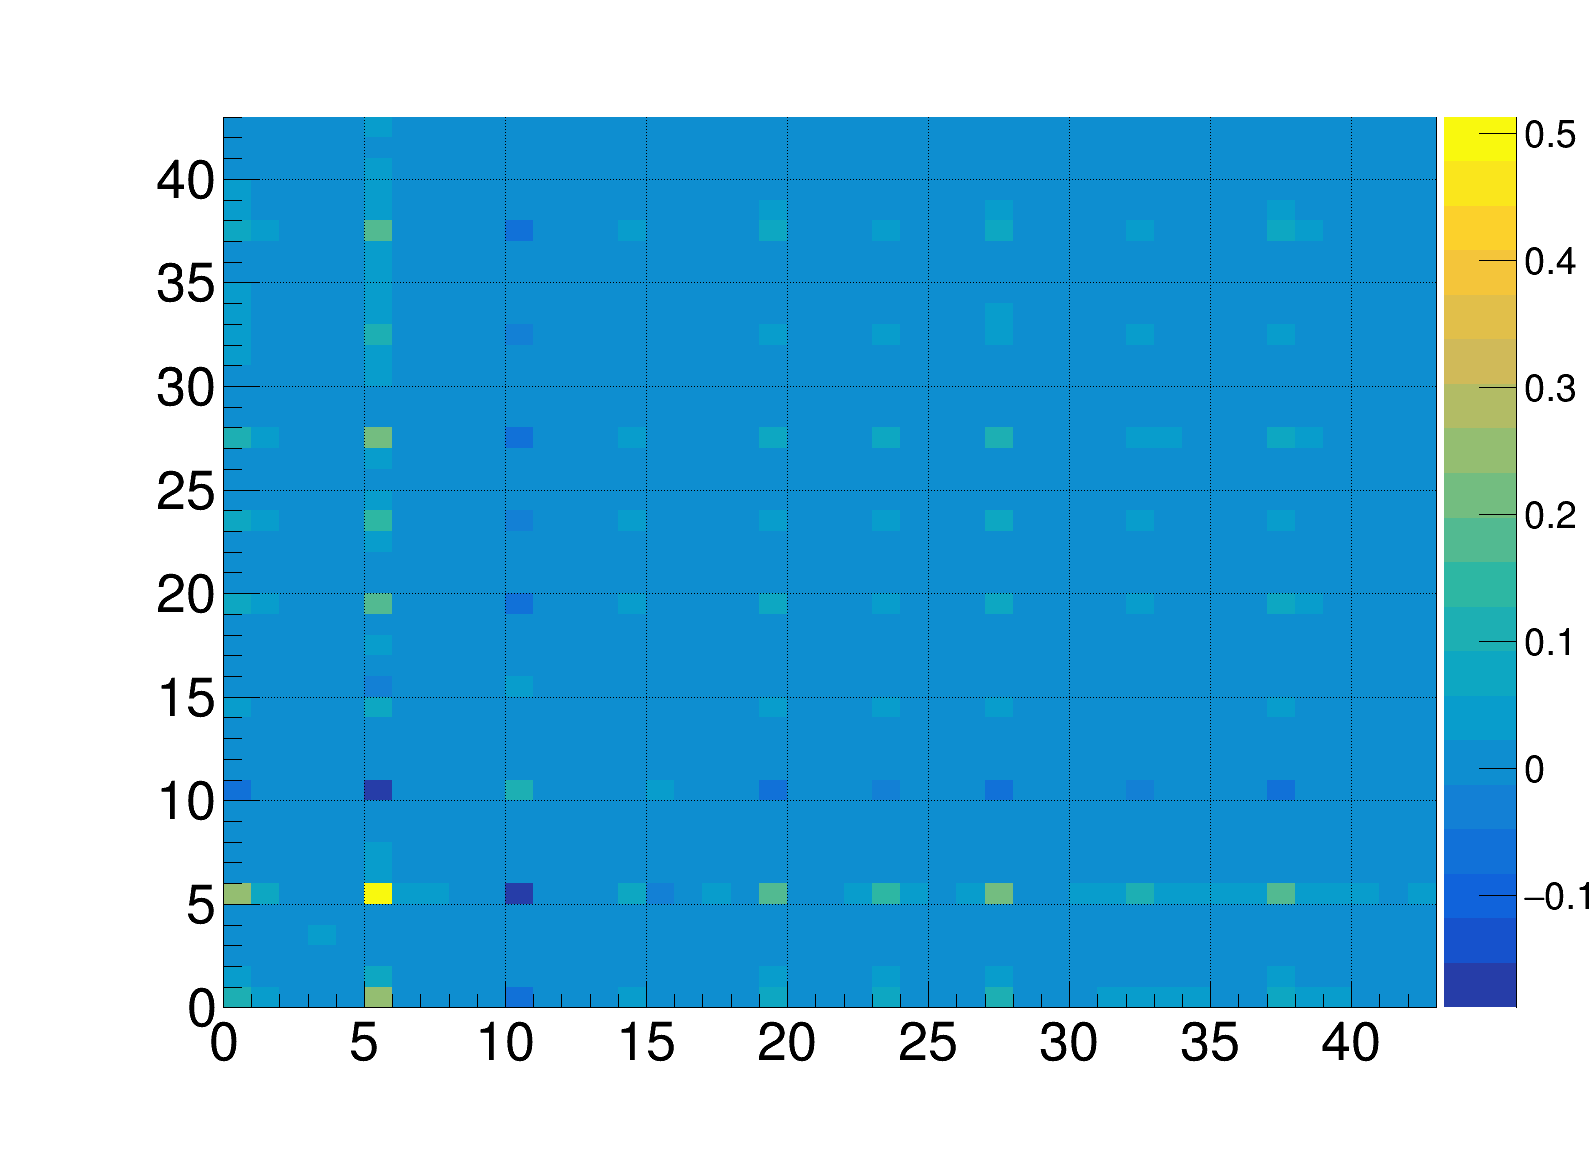

In [106]:
test_arr = [0,1,2,3,4,5,7,1,3,0]
arr = np.array(frac_covar_flux)
test = plot_array(arr)
test.Draw('colz')
c1.Draw()

In [89]:
arr2 = plot2arr(test,2)
print arr2

[43. 43.]
[[0.11435606 0.03715563 0.01500926 ... 0.01953545 0.0164719  0.01978772]
 [0.03715563 0.01759125 0.01174773 ... 0.01287758 0.01201168 0.01222248]
 [0.01500926 0.01174773 0.01059799 ... 0.0107146  0.01049674 0.00980107]
 ...
 [0.01953545 0.01287758 0.0107146  ... 0.01107802 0.01071316 0.0102251 ]
 [0.0164719  0.01201168 0.01049674 ... 0.01071316 0.01045935 0.00982274]
 [0.01978772 0.01222248 0.00980107 ... 0.0102251  0.00982274 0.01001952]]


In [ ]:
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)

c1.cd()

pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)

main_plot(h_data)

hs = ROOT.THStack("hs","");
h_ext.SetFillColor(ROOT.kBlue+2)
h_ext.SetLineColor(ROOT.kBlue+2)
h_ext.SetFillStyle(3004)
h_dirt.SetFillColor(ROOT.kOrange+2);
h_dirt.SetLineColor(ROOT.kOrange+2);
h_bkg.SetFillColor(ROOT.kGray)
h_bkg.SetLineColor(ROOT.kGray)
h_reco.SetFillColor(ROOT.kRed)
h_reco.SetLineColor(ROOT.kRed)
hs.Add(h_ext)
hs.Add(h_dirt)
hs.Add(h_bkg)
hs.Add(h_reco)

h_data.SetXTitle("Reco bin number")
h_data.SetYTitle("Number of events")

h_tot = h_reco.Clone()
h_tot.Add(h_bkg)
for i in range(43):
    h_tot.SetBinError(i+1,math.sqrt(frac_tot[i][i])*h_tot.GetBinContent(i+1))
h_tot.Add(h_ext)
h_tot.Add(h_dirt)
h_tot.SetFillColor(ROOT.kBlack)
h_tot.SetLineColor(ROOT.kBlack)
h_tot.SetFillStyle(3004)
h_data.Draw('E1')
h_histo = histBkg(h_err)
h_histo.Draw('hist same')
hs.Draw('same hist')
h_tot.Draw('same E2')
h_data.Draw('E1 same')

pot_data = 2.144e+20
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()

h_data.GetYaxis().SetTitleOffset(1);
h_data.GetXaxis().SetLabelOffset(999);
h_data.GetXaxis().SetTitleOffset(999);
h_data.GetXaxis().SetLabelSize(0);
h_data.GetXaxis().SetTitleSize(0);

c1.cd()
h_data.GetXaxis().SetLabelOffset(0);
h_data.GetXaxis().SetTitleOffset(0);

pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()
h_tot_noerr = h_tot.Clone()
for i in range(43):
    h_tot_noerr.SetBinError(i,0)
h_xsec_data_ratio = h_data.Clone()
h_xsec_data_ratio.Divide(h_tot_noerr)
h_mc_ratio = h_tot.Clone()
h_mc_ratio.Divide(h_tot_noerr)

h_xsec_data_ratio.SetYTitle('Data/(Ext+MC)')
h_xsec_data_ratio.GetYaxis().SetTitleSize(0.1)
h_xsec_data_ratio.GetYaxis().SetTitleOffset(0.3)
h_xsec_data_ratio.GetYaxis().SetLabelSize(0.07)
h_xsec_data_ratio.GetXaxis().SetTitleSize(0.15)
h_xsec_data_ratio.GetXaxis().SetLabelSize(0.15)
h_xsec_data_ratio.GetXaxis().SetTitleOffset(1)
h_xsec_data_ratio.SetMaximum(2)
h_xsec_data_ratio.Draw('E1')
h_histo.Draw('hist same')
h_mc_ratio.Draw('E2 same')

c1.Draw()
c1.SaveAs(outputdir_png + "event_rate.png")
c1.SaveAs(outputdir_root + "event_rate.root")
c1.SaveAs(outputdir_pdf + "event_rate.pdf")


In [ ]:
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)

c1.cd()

pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)

h_xsec_data = h_data.Clone()
h_xsec_data.Add(h_ext,-1)
h_xsec_data.Add(h_dirt,-1)
h_xsec_data.Add(h_bkg,-1)

h_xsec_data.Scale(1.0/(N_tot*flux_cv*1e-38))

h_xsec_reco = h_reco.Clone()

for i in range(43):
    h_xsec_reco.SetBinError(i+1,math.sqrt(frac_tot[i][i])*(h_reco.GetBinContent(i+1)))#+h_bkg.GetBinContent(i+1)))
    
h_xsec_reco.Scale(1.0/(N_tot*flux_cv*1e-38))

bin_counter = 0
for t_bin in range(len_theta): #len_theta
    h_temp = f_cv.Get('h_data['+str(t_bin)+']')
    for m_bin in range(len_mom[t_bin]):
        bin_counter+=1
        bin_width =  h_temp.GetBinWidth(m_bin+1)
        bin_width_theta = theta_bins[t_bin+1] - theta_bins[t_bin]
        h_xsec_data.SetBinContent(bin_counter,h_xsec_data.GetBinContent(bin_counter)/(bin_width*bin_width_theta))
        h_xsec_data.SetBinError(bin_counter,h_xsec_data.GetBinError(bin_counter)/(bin_width*bin_width_theta))
        h_xsec_reco.SetBinContent(bin_counter,h_xsec_reco.GetBinContent(bin_counter)/(bin_width*bin_width_theta))
        h_xsec_reco.SetBinError(bin_counter,h_xsec_reco.GetBinError(bin_counter)/(bin_width*bin_width_theta))

h_xsec_data.SetXTitle("Reco bin number")
h_xsec_data.SetYTitle("#frac{#sigma^{2}}{dp_{#mu} dcos(#theta)} \t [10^{-38} #frac{cm^{2}}{GeV Nucleon}]")


h_xsec_reco.SetFillColor(ROOT.kRed)
h_xsec_reco.SetLineColor(ROOT.kRed)
h_xsec_reco.SetFillStyle(3004)
h_xsec_data.Draw('E1')
h_histo = histBkg(h_err)
h_histo.Draw('hist same')
h_xsec_reco.Draw('same E2')
h_xsec_reco2 = h_xsec_reco.Clone()
h_xsec_reco2.SetFillColor(0)
h_xsec_reco2.Draw('same hist')

h_xsec_data.Draw('E1 same')

pot_data = 2.144e+20
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()

h_xsec_data.GetYaxis().SetTitleOffset(0.9);
h_xsec_data.GetXaxis().SetLabelOffset(999);
h_xsec_data.GetXaxis().SetTitleOffset(999);
h_xsec_data.GetXaxis().SetLabelSize(0);
h_xsec_data.GetXaxis().SetTitleSize(0);

c1.cd()
h_xsec_data.GetXaxis().SetLabelOffset(0);
h_xsec_data.GetXaxis().SetTitleOffset(0);

pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()
h_tot_noerr = h_xsec_reco.Clone()
for i in range(43):
    h_tot_noerr.SetBinError(i,0)
h_xsec_data_ratio = h_xsec_data.Clone()
h_xsec_data_ratio.Divide(h_tot_noerr)
h_mc_ratio = h_xsec_reco.Clone()
h_mc_ratio.Divide(h_tot_noerr)
#frac{Data - Bkg}{MC}
h_xsec_data_ratio.SetYTitle('#frac{Data - Bkg}{MC}')
h_xsec_data_ratio.GetYaxis().SetTitleSize(0.1)
h_xsec_data_ratio.GetYaxis().SetTitleOffset(0.3)
h_xsec_data_ratio.GetYaxis().SetLabelSize(0.07)
h_xsec_data_ratio.GetXaxis().SetTitleSize(0.15)
h_xsec_data_ratio.GetXaxis().SetLabelSize(0.15)
h_xsec_data_ratio.GetXaxis().SetTitleOffset(1)
h_xsec_data_ratio.SetMaximum(2)
h_xsec_data_ratio.Draw('E1')
h_histo.Draw('hist same')

h_mc_ratio.Draw('E2 same')

c1.Draw()
c1.SaveAs(outputdir_png + "xsec.png")
c1.SaveAs(outputdir_root + "xsec.root")
c1.SaveAs(outputdir_pdf + "xsec.pdf")
